<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 Anomaly Detection AutoEncoder || Generative-AI🔥</div>
</div>

![](https://sematext.com/wp-content/uploads/2023/03/Anomaly-detection.png)

Here are some detailed points about anomaly detection:

1. **Definition**: Anomaly detection, also known as outlier detection, is the process of identifying data points or patterns in a dataset that do not conform to the expected behavior or normal trends. These anomalies are often interesting or critical because they may indicate potential issues, outliers, or unexpected events.

2. **Applications**:
   - **Fraud Detection**: Identifying unusual transactions or activities that deviate from typical spending patterns.
   - **Cybersecurity**: Detecting unusual network traffic or behavior that could indicate a security breach.
   - **Healthcare**: Identifying abnormal medical readings or patient records that may signal health problems.
   - **Industrial Systems**: Monitoring equipment sensors to detect anomalies that could lead to failures or accidents.
   - **Quality Control**: Detecting defects or irregularities in manufacturing processes.
   - **Financial Market Monitoring**: Detecting unusual trading activities that may indicate market manipulation.

3. **Methods and Techniques**:
   - **Statistical Methods**: Such as z-score analysis, which measures how many standard deviations a data point is away from the mean.
   - **Machine Learning**: Using supervised or unsupervised learning techniques, including clustering algorithms (like k-means) or classification algorithms (like isolation forests or one-class SVMs).
   - **Deep Learning**: Utilizing neural networks for anomaly detection, such as autoencoders that learn to reconstruct normal patterns and detect deviations.

4. **Challenges**:
   - **Imbalanced Data**: Anomalies are often rare compared to normal data, making it challenging to train models effectively.
   - **Adaptability**: Anomalies can evolve over time, requiring adaptive models that can learn and update in real-time.
   - **Interpretability**: Understanding why a model flags a particular instance as anomalous can be crucial for decision-making.

5. **Evaluation**:
   - **True Positive Rate**: The ability of the model to correctly identify anomalies.
   - **False Positive Rate**: The rate at which normal instances are incorrectly flagged as anomalies.
   - **Precision and Recall**: Measures of the model's accuracy in identifying anomalies while minimizing false alarms.

6. **Benefits**:
   - Early detection of anomalies can prevent fraud, system failures, and other critical issues.
   - Improves operational efficiency by focusing resources on areas that need attention.
   - Enhances security by proactively identifying and mitigating potential threats.

7. **Future Directions**:
   - Integration with real-time streaming data for continuous monitoring.
   - Advancements in explainable AI to enhance model transparency and trust.
   - Application in emerging fields such as Internet of Things (IoT) for predictive maintenance and anomaly detection.

Anomaly detection plays a crucial role across various domains, offering insights and safeguards against unexpected events and deviations from normal behavior.

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📚 Importing Libraries 📚</div>
</div>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

2024-07-04 18:44:31.608138: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 18:44:31.608266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 18:44:31.777036: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🧾Loading Dataset🧾</div>
</div>

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Use only '1' digit for normal training data
normal_class = 1
x_train = x_train[y_train == normal_class]
x_test = x_test[y_test == normal_class]

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🛠 Normalization 🛠</div>
</div>

In [4]:
# Normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [6]:
anomalous_data = np.concatenate([x_test, np.random.rand(1000, 28, 28, 1)])
anomalous_labels = np.concatenate([np.zeros(len(x_test)), np.ones(1000)])

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 Anomaly-Detection AutoEncoder Model 🔥</div>
</div>

In [7]:
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print model summary
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Model Training ✔
  </div>
</div>

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)

Epoch 1/50
18/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5685 

I0000 00:00:1720118693.800658      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - loss: 0.5373 - val_loss: 0.1420
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1055 - val_loss: 0.0591
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0576 - val_loss: 0.0507
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0511 - val_loss: 0.0477
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0479 - val_loss: 0.0455
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0457 - val_loss: 0.0447
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0450 - val_loss: 0.0431
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0436 - val_loss: 0.0419
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0427 - val_loss: 0.0415
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0420 - val_loss: 0.0408
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0413 - val_loss: 0.0404
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0410 - val

In [9]:
reconstructed = autoencoder.predict(anomalous_data)
reconstruction_error = np.mean(np.square(anomalous_data - reconstructed), axis=(1, 2, 3))

67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [10]:
# Set a threshold for anomaly detection
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)

# Identify anomalies
anomalies = reconstruction_error > threshold

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 Anomaly-Detection AutoEncoder Random Prediction🔥</div>
</div>

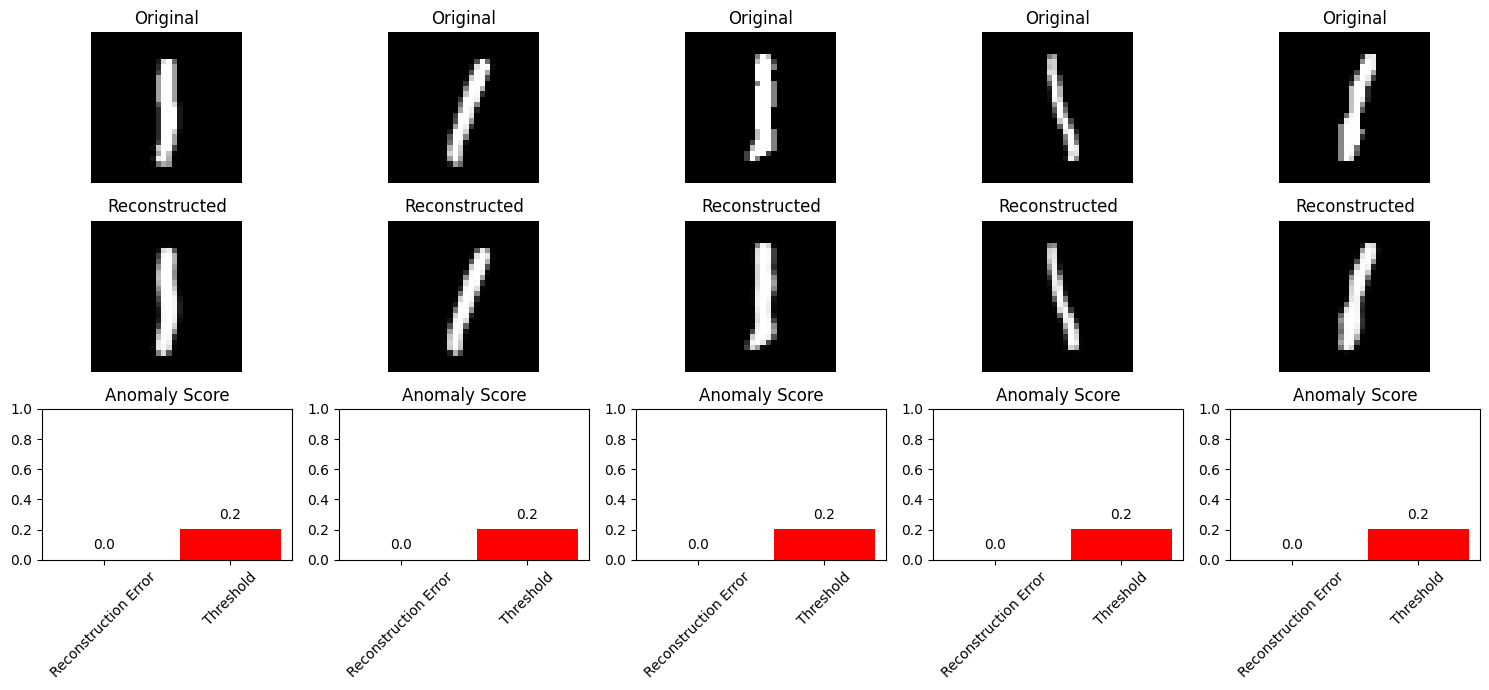

In [11]:
import matplotlib.pyplot as plt

# Select random indices to display
random_indices = [10, 1, 2, 24, 48]  # Replace with your random indices

plt.figure(figsize=(15, 7))

for idx, i in enumerate(random_indices):
    # Original image
    ax = plt.subplot(3, 5, idx + 1)
    plt.imshow(anomalous_data[i].reshape(28, 28), cmap='gray')
    ax.set_title('Original', fontsize=12)
    ax.axis('off')
    
    # Reconstructed image
    ax = plt.subplot(3, 5, idx + 6)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    ax.set_title('Reconstructed', fontsize=12)
    ax.axis('off')

    # Anomaly score
    ax = plt.subplot(3, 5, idx + 11)
    bars = ax.bar(['Reconstruction Error', 'Threshold'], [reconstruction_error[i], threshold], color=['blue', 'red'])
    ax.set_ylim(0, 1)  # Adjust y-axis limit based on your data range
    ax.set_title('Anomaly Score', fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)
    
    # Add labels to bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [12]:
print("Number of anomalies detected: ", np.sum(anomalies))
print("Anomaly detection accuracy: ", np.mean(anomalies == anomalous_labels))

Number of anomalies detected:  0
Anomaly detection accuracy:  0.531615925058548
